# Lab 11: Ordinary differential equations (1)

In this laboratory we'll begin to investigate ordinary differential equations – *ordinary* as opposed to *partial*, since we will consider only functions of a single variable. We'll begin by investigating first-order ODEs involving scalar functions, then continue to see how higher-order ODEs, coupled ODEs, and vector functions can all be investigated using very similar Python code. Specifically, we will be looking at *initial value problems* where the conditions at $t = 0$ are specified (the alternative, *boundary value problems*, might make an interesting final project).

We'll begin by coding two methods to solve ODEs: the very simple Euler method and the only slightly less simple second-order Runge-Kutta method.

In [8]:
# Start by importing our usual helper modules.

import numpy as np
import matplotlib.pyplot as plt
% matplotlib notebook

To explore how these solution algorithms work, we'll solve an equation to which we already know the answer. Specifically, we will consider $\dot x(t) = -kx(t)$, to which the exact solution is of course $x(t) = A\exp(-kt)$ (and therefore $\dot x(t) = -kA\exp(-kt)$).

**Write a function `derivative(t, x)` that returns the expected derivative, encoding this equation in Python.** Note that in this case the derivative *doesn't* depend on $t$, and moreover that it *does* depend on the parameter $k$. Nonetheless set up the function in this way for ease of using the Python built-in tools later on.

In [2]:
def derivative(t, x):
    return -k*x
#we wakanda up in dis bich

## The Euler method

Using the Euler method to solve $\mathrm dx/\mathrm dt = f(t, x)$, each step follows the following mathematical rules:

$$
\begin{align}
t_1 &= t_0 + \Delta t\\
x_1 &= x_0 + v_0\Delta t\\
v_1 &= f(t_1, x_1)
\end{align}
$$

To use the Euler method to solve this equation, we therefore do the following: 

We begin by specifying the constant `k`, the timestep `dt`, the total time `t_total`, and the initial conditions `t = 0` and `x = 1`. For convenience, we also start lists that will hold *all* of the `t`, `x`, and `v` values we run through. 

Then, translating the mathematics above into Python, we proceed as follows:

    Loop (t_total / dt) times:
        Increase t by dt
        Increase x by v*dt
        Update v using the derivative function with the new t and x
        
        Append t to t_list, x to x_list, and v to v_list
        
**Complete the following code using the algorithm above.**

In [6]:
k = 1.5
dt = 0.35
t_total = 5

t = 0
x = 1
v = derivative(t, x)

t_list = [t]       
x_list = [x] 
v_list = [v]     

for i in range(int(t_total / dt)):
    t = t + dt
    x = x + v*dt
    v = derivative(t,x)
    

    t_list.append(t)
    x_list.append(x)
    v_list.append(v)

**Complete the following code to plot the $x$ and $v$ values you obtain as a function of time, along with the exact solution.**

<IPython.core.display.Javascript object>


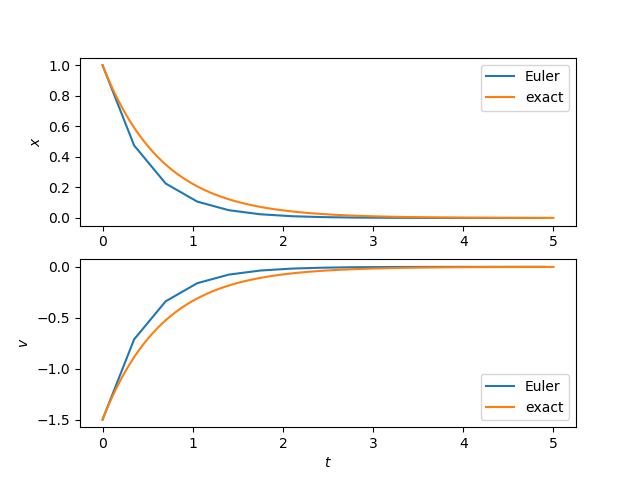

In [9]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_list, x_list, label="Euler")
def x(t): return np.exp(-k*t)
T = np.linspace(0, 5, 100)
X = x(T)
plt.plot(T, X, label="exact")
plt.ylabel("$x$")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_list, v_list, label="Euler")
V = derivative(T, X)
plt.plot(T, V, label="exact")
plt.ylabel("$v$")
plt.xlabel("$t$")
plt.legend()

▶ **CHECKPOINT 1**

## The RK2 method

To use the second-order Runge-Kutta method, on the other hand, the algorithm is as follows:

$$
\begin{align}
t_\text{int} &= t_0 + \tfrac12\Delta t\\
x_\text{int} &= x_0 + \tfrac12v_0\Delta t\\
v_\text{int} &= f(t_\text{int}, x_\text{int})\\
\\
t_1 &= t_0 + \Delta t\\
x_1 &= x_0 + v_\text{int}\Delta t\\
v_1 &= f(t_1, x_1)
\end{align}
$$
        
**Complete the following code using this new algorithm.**

In [85]:
k = 1.5

dt = 0.35
t = 0
x = 1
v = derivative(t, x)

t_list2 = [t]       
x_list2 = [x] 
v_list2 = [v]   

t_total = 5

for i in range(int(t_total/dt)):
    
    t_int = t + 0.5*dt
    x_int = x + 0.5*v*dt
    v_int = derivative(t_int, x_int)
   
    t = t + dt
    x = x + v_int*dt
    v = derivative(t,x)
    
    t_list2.append(t)
    x_list2.append(x)
    v_list2.append(v)

**Complete the following code to add your new results to the previous plot. Which of your results is closer to the exact value?**

<IPython.core.display.Javascript object>


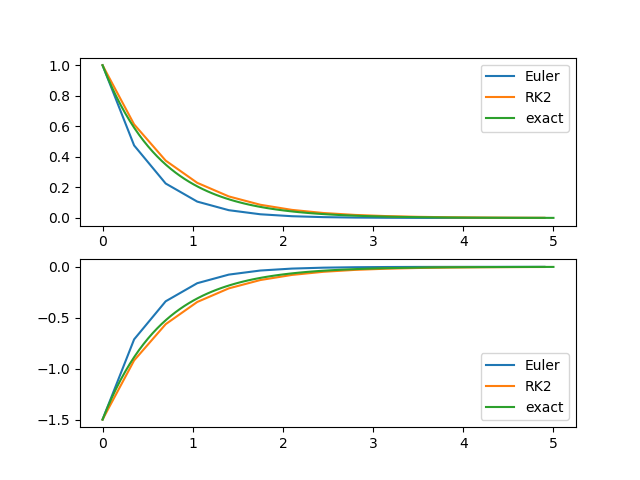

In [86]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_list, x_list, label="Euler")
plt.plot(t_list2, x_list2, label="RK2")
plt.plot(T, X, label="exact")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t_list, v_list, label="Euler")
plt.plot(t_list2, v_list2, label="RK2")
plt.plot(T, V, label="exact")
plt.legend()

An even more accurate method, commonly used in practice, is the fourth-order Runge-Kutta method. Rather than code this ourselves, we'll use the built-in method `solve_ivp`:

In [16]:
from scipy.integrate import solve_ivp

In [88]:
?solve_ivp

**Use this method – remembering to use the online help (`?solve_ivp`) as needed – to solve the same equation. Once again, plot your results with the exact solution.**

*Hint:* if you write `RK4_solution = solve_ivp(...)` then you can access the $x$ results as `RK4_solution.y` and the $t$ results as `RK4_solution.t`.

*Hint 2:* by default the solution is provided only at a limited number of $t$ values. This is fine, but if you want more, or specific $t$ values, use the `t_eval` optional argument.

In [92]:
RK4_solution = solve_ivp(derivative, (0,5), np.array([1]))
print(RK4_solution)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.0850453 , 0.70492322, 1.32480114, 1.94467905,
       2.56455697, 3.18443489, 3.80431281, 4.42419073, 5.        ])
 t_events: None
        y: array([[1.00000000e+00, 8.80233605e-01, 3.47614944e-01, 1.37277365e-01,
        5.42124991e-02, 2.14091745e-02, 8.45474311e-03, 3.33888077e-03,
        1.31856458e-03, 5.56134778e-04]])


▶ **CHECKPOINT 2**

## The harmonic oscillator and energy conservation

There is a more important difference between the Euler and RK2 methods, for physics problems, than is initially obvious. To see this, and to extend our method to a second-order equation, we consider a harmonic oscillator:

$$
\begin{align}
V(x) &= \tfrac12 k x^2 \\
F = m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx
\end{align}
$$

To represent this in Python, we let `x` be an *array* containing two elements, where the first represents $x$ and the second $\mathrm dx/\mathrm dt$. **Complete the following code to represent this in Python:**

In [1]:
k = 1. 
m = 1.

def derivative_harmonic(t, x):
    x0, x1 = x 
    dx0 = x1
    dx1 = -k*x0
    return np.array((dx0, dx1))

**Complete the following code to solve this equation using the Euler method.** This is almost the same as above; we just need to use the `copy` function to copy `array`s (otherwise we will end up with multiple names for the *same* space in memory, which will give peculiar results!).

In [23]:
t_total = 10
dt = 0.1
t = 0
x = np.array((1., 0))
v = derivative_harmonic(t, x)

t_list = [t]       
x_list = [x.copy()] 
v_list = [v.copy()]     

for i in range(int(t_total/dt)):
    t = t + dt
    x = x + v*dt
    v = derivative_harmonic(t,x)
    
    t_list.append(t)
    x_list.append(x.copy())
    v_list.append(v.copy())

t_list = np.array(t_list)
x_list = np.array(x_list)

Now **complete the following code to plot the position $x$, velocity $v$, kinetic energy $K$, potential energy $V$, and total energy $E$ as a function of time. What do you notice?**

<IPython.core.display.Javascript object>


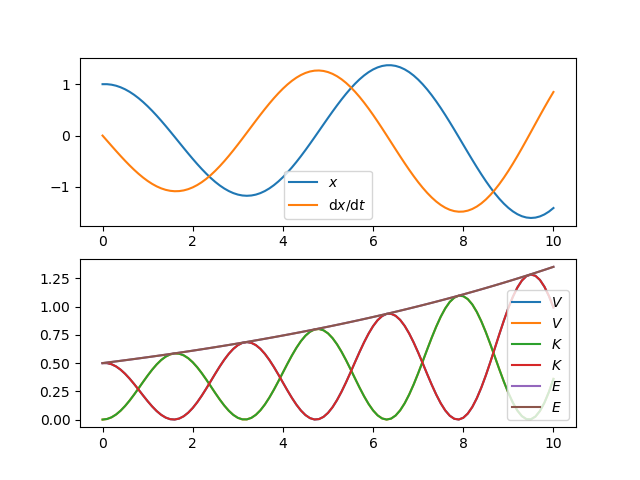

In [24]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_list, x_list[:,0], label="$x$")
plt.plot(t_list, x_list[:,1], label='$\\mathrm{d}x/\\mathrm{d}t$')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t_list, (0.5)*k*np.array(x_list)**2, label="$V$")
plt.plot(t_list, (0.5)*m*np.array(v_list)**2, label="$K$")
plt.plot(t_list,(0.5)*k*np.array(x_list)**2 + (0.5)*m*np.array(v_list)**2 , label="$E$")
plt.legend()

**Copy and modify the code above to perform the same calculation for the RK2 method. Compare the behaviour of the two methods.**

▶ **CHECKPOINT 3**

In [48]:
t_total = 10
dt = 0.1
t = 0
x = np.array((1., 0))
v = derivative_harmonic(t, x)

t_list = [t]       
x_list = [x.copy()] 
v_list = [v.copy()]     

for i in range(int(t_total/dt)):
    
    t_int = t + 0.5*dt
    x_int = x + 0.5*v*dt
    v_int = derivative_harmonic(t_int, x_int)
    
    t = t + dt
    x = x + v_int*dt
    v = derivative_harmonic(t,x)
    
    t_list.append(t)
    x_list.append(x.copy())
    v_list.append(v.copy())

t_list = np.array(t_list)
x_list = np.array(x_list)


<IPython.core.display.Javascript object>


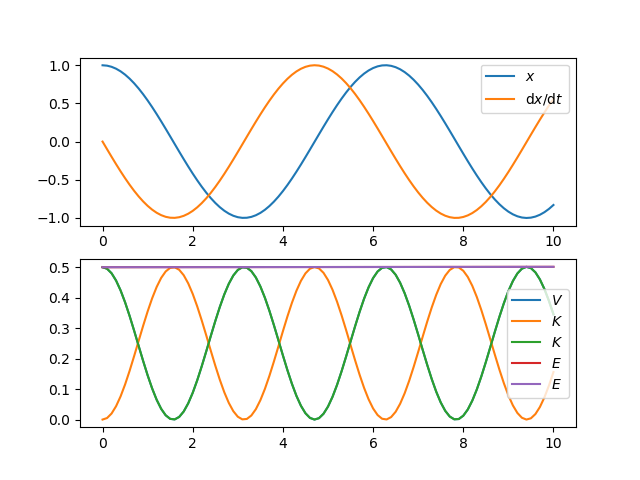

In [52]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_list, x_list[:,0], label="$x$")
plt.plot(t_list, x_list[:,1], label='$\\mathrm{d}x/\\mathrm{d}t$')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t_list, (0.5)*k*np.array(x_list[:,0])**2, label="$V$")
plt.plot(t_list, (0.5)*m*np.array(v_list)**2, label="$K$")
plt.plot(t_list,(0.5)*k*np.array(x_list)**2 + (0.5)*m*np.array(v_list)**2 , label="$E$")
plt.legend()